# Computinh Topic Diversity

In [82]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from scipy.stats import entropy, shapiro, levene, ttest_ind, mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
topic_distribuition = pd.read_csv('../../src/nlp/topic_modeling/global_metadata.csv')
topic_distribuition = topic_distribuition.loc[topic_distribuition['topic_id'] != '-1']
topic_distribuition.head()

,author,id_x,type,community_id,community_type,is_hub,is_bridge,topic,topic_id
0,the_original_Retro,t3_1lys6tq,post,0.0,Strong community,True,False,60_epstein_files_list_release,60
1,WavesAndSaves,t3_1lwtuom,post,0.0,Strong community,True,False,-1_trump_israel_right_democrats,-1
2,Balanced_Outlook,t3_1ltucm0,post,0.0,Strong community,True,False,202_constitution_congress_founders_branch,202
3,Objective_Aside1858,t3_1lqz0jq,post,0.0,Strong community,True,False,-1_trump_israel_right_democrats,-1
4,Raichu4u,t3_1lqfnfy,post,0.0,Strong community,True,False,-1_trump_israel_right_democrats,-1


In [84]:
user_groupby = topic_distribuition.groupby(['author', 'topic']).size().astype(int).reset_index(name='count')
user_groupby

,author,topic,count
0,-SOFA-KING-VOTE-,-1_trump_israel_right_democrats,38
1,-SOFA-KING-VOTE-,0_iran_nuclear_uranium_iranian,10
2,-SOFA-KING-VOTE-,209_luck_wtf_nothing_ikr,1
3,-SOFA-KING-VOTE-,20_protests_protest_protesting_peaceful,1
4,-SOFA-KING-VOTE-,223_prize_nobel_peace_churchill,1
...,...,...,...
4775,zaoldyeck,614_kerry_bussing_mueller_column,1
4776,zaoldyeck,63_empathy_conservatives_empathetic_liberals,1
4777,zaoldyeck,645_green_visa_visas_revoke,1
4778,zaoldyeck,685_bailout_aca_maneuvering_patton,1


In [85]:
user_topic_matrix = user_groupby.pivot(index='author', columns='topic', values='count').fillna(0)
user_topic_matrix

topic,-1_trump_israel_right_democrats,0_iran_nuclear_uranium_iranian,100_radical_leftists_leftist_left,101_trolley_lever_problem_tracks,102_point_proving_points_ops,103_undisclosed_content_purely_contradictions,104_friends_platonic_attracted_attractive,105_view_changed_views_change,106_third_parties_party_3rd,107_musk_elon_trump_twitter,...,8_men_women_feminism_misogyny,90_weight_fat_calories_shaming,91_harris_biden_2024_primary,92_ed_sex_parents_opt,94_vaccine_vaccines_covid_vaccination,95_nba_wnba_players_league,96_deficit_trillion_debt_covid,97_morality_objective_moral_subjective,98_afghanistan_taliban_laden_bin,99_kamala_woman_harris_female
author,,,,,,,,,,,,,,,,,,,,,
-SOFA-KING-VOTE-,38.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8to24,60.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
AdministrativeSet419,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Admirable-Lecture255,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AdmiralSaturyn,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vampiregamingYT,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
weedywet,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wha-haa,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [86]:
# Normalizing topic distribuition by users
user_topic_proportions = user_topic_matrix.div(user_topic_matrix.sum(axis=1), axis=0)
user_topic_proportions

topic,-1_trump_israel_right_democrats,0_iran_nuclear_uranium_iranian,100_radical_leftists_leftist_left,101_trolley_lever_problem_tracks,102_point_proving_points_ops,103_undisclosed_content_purely_contradictions,104_friends_platonic_attracted_attractive,105_view_changed_views_change,106_third_parties_party_3rd,107_musk_elon_trump_twitter,...,8_men_women_feminism_misogyny,90_weight_fat_calories_shaming,91_harris_biden_2024_primary,92_ed_sex_parents_opt,94_vaccine_vaccines_covid_vaccination,95_nba_wnba_players_league,96_deficit_trillion_debt_covid,97_morality_objective_moral_subjective,98_afghanistan_taliban_laden_bin,99_kamala_woman_harris_female
author,,,,,,,,,,,,,,,,,,,,,
-SOFA-KING-VOTE-,0.535211,0.140845,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
8to24,0.674157,0.033708,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.022472,...,0.0,0.0,0.022472,0.0,0.0,0.0,0.011236,0.0,0.0,0.000000
AdministrativeSet419,0.200000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
Admirable-Lecture255,0.545455,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
AdmiralSaturyn,0.636364,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.015152,0.000000,...,0.0,0.0,0.015152,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vampiregamingYT,0.470588,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.058824,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
weedywet,0.388889,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
wha-haa,0.531915,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.042553


In [87]:
# Computes topic entropy for each user -> how many different topics uses each different user
user_topic_entropy = user_topic_proportions.apply(lambda x: entropy(x, base=2), axis=1)
user_topic_entropy

author
-SOFA-KING-VOTE-        2.693474
8to24                   2.237887
AdministrativeSet419    1.156780
Admirable-Lecture255    1.867634
AdmiralSaturyn          2.377923
                          ...   
vampiregamingYT         2.558051
weedywet                2.855954
wha-haa                 3.041899
wydileie                1.971372
zaoldyeck               2.503566
Length: 284, dtype: float64

In [88]:
user_stats = topic_distribuition.merge(user_topic_entropy.rename('topic_diversity'), left_on='author', right_index=True)
user_stats.head()

,author,id_x,type,community_id,community_type,is_hub,is_bridge,topic,topic_id,topic_diversity
0,the_original_Retro,t3_1lys6tq,post,0.0,Strong community,True,False,60_epstein_files_list_release,60,1.960964
1,WavesAndSaves,t3_1lwtuom,post,0.0,Strong community,True,False,-1_trump_israel_right_democrats,-1,3.238691
2,Balanced_Outlook,t3_1ltucm0,post,0.0,Strong community,True,False,202_constitution_congress_founders_branch,202,2.894605
3,Objective_Aside1858,t3_1lqz0jq,post,0.0,Strong community,True,False,-1_trump_israel_right_democrats,-1,3.518628
4,Raichu4u,t3_1lqfnfy,post,0.0,Strong community,True,False,-1_trump_israel_right_democrats,-1,1.938679


In [89]:
# Filtering topic which index is -1 cause it represents an 'outlier' topic
hub_topic_diversity = pd.Series(user_stats.loc[user_stats['is_hub'], 'topic_diversity'])
bridge_topic_diversity = pd.Series(user_stats.loc[user_stats['is_bridge'], 'topic_diversity'])

# Test di normalità
shapiro_hub = shapiro(hub_topic_diversity)
shapiro_bridge = shapiro(bridge_topic_diversity)
print("Shapiro Hub:", shapiro_hub)
print("Shapiro Bridge:", shapiro_bridge)

# Test di omogeneità varianze
levene_test = levene(hub_topic_diversity, bridge_topic_diversity)
print("Levene:", levene_test)

# Scelta del test
if shapiro_hub.pvalue > 0.05 and shapiro_bridge.pvalue > 0.05:
    if levene_test.pvalue > 0.05:
        print("T-test:", ttest_ind(hub_topic_diversity, bridge_topic_diversity))
    else:
        print("T-test var unequal:", ttest_ind(hub_topic_diversity, bridge_topic_diversity, equal_var=False))
else:
    print("Mann-Whitney:", mannwhitneyu(hub_topic_diversity, bridge_topic_diversity, alternative='two-sided'))


Shapiro Hub: ShapiroResult(statistic=np.float64(0.9455501227118435), pvalue=np.float64(5.758681009026691e-48))
Shapiro Bridge: ShapiroResult(statistic=np.float64(0.9845556118039132), pvalue=np.float64(2.39134273219264e-28))
Levene: LeveneResult(statistic=np.float64(24.11184789107417), pvalue=np.float64(9.178713027690984e-07))
Mann-Whitney: MannwhitneyuResult(statistic=np.float64(43354994.5), pvalue=np.float64(1.3899351576030722e-287))


/home/acaia/Analysa/Analysa/.analysa/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8337.
  res = hypotest_fun_out(*samples, **kwds)
/home/acaia/Analysa/Analysa/.analysa/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7824.
  res = hypotest_fun_out(*samples, **kwds)


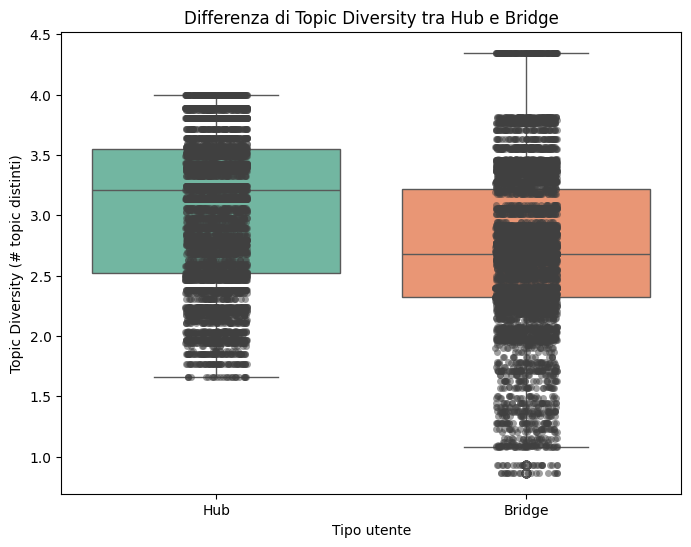

In [90]:
# Esempio: uso delle Series già definite (hub_topic_diversity e bridge_topic_diversity)
data = {
    "topic_diversity": list(hub_topic_diversity) + list(bridge_topic_diversity),
    "user_type": ["Hub"] * len(hub_topic_diversity) + ["Bridge"] * len(bridge_topic_diversity)
}

plot_df = pd.DataFrame(data)

# Boxplot + swarmplot per dettaglio
plt.figure(figsize=(8, 6))
sns.boxplot(data=plot_df, x="user_type", y="topic_diversity", palette="Set2", hue="user_type",)
sns.stripplot(
    data=plot_df, 
    x="user_type", 
    y="topic_diversity", 
    color=".25", 
    alpha=0.5, 
    jitter=True
)


plt.title("Differenza di Topic Diversity tra Hub e Bridge")
plt.ylabel("Topic Diversity (# topic distinti)")
plt.xlabel("Tipo utente")
plt.show()


# Computing Linguistic generality for both hub and bridge users

In [91]:
user_texts = pd.read_csv('../../src/nlp/cleaned_dataset.csv')
user_texts = user_texts.merge(topic_distribuition, left_on='author', right_on='author', how='inner')
user_texts = user_texts.loc[user_texts['is_hub'] | user_texts['is_bridge']]
user_texts.head()

,author,id,type_x,clean_text,id_x,type_y,community_id,community_type,is_hub,is_bridge,topic,topic_id
0,the_original_Retro,t3_1lys6tq,post,recent days maga outspoken influencers rushing...,t3_1lys6tq,post,0.0,Strong community,True,False,60_epstein_files_list_release,60
1,the_original_Retro,t3_1lys6tq,post,recent days maga outspoken influencers rushing...,t1_mz59oq5,comment,0.0,Strong community,True,False,-1_trump_israel_right_democrats,-1
2,the_original_Retro,t3_1lys6tq,post,recent days maga outspoken influencers rushing...,t1_mz5ksxt,comment,0.0,Strong community,True,False,-1_trump_israel_right_democrats,-1
3,the_original_Retro,t3_1lys6tq,post,recent days maga outspoken influencers rushing...,t1_mw7u3y1,comment,0.0,Strong community,True,False,107_musk_elon_trump_twitter,107
4,the_original_Retro,t3_1lys6tq,post,recent days maga outspoken influencers rushing...,t1_mwaytga,comment,0.0,Strong community,True,False,-1_trump_israel_right_democrats,-1


In [92]:
user_texts_agg = user_texts.groupby('author')['clean_text'].apply(lambda x : "".join(str(x))).reset_index()

In [93]:
# Using global TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', min_df=2) #cut-off value
tfidf_matrix = vectorizer.fit_transform(user_texts_agg['clean_text'])

In [94]:
vectorizer.get_feature_names_out()

array(['10', '100', '1024', '11', '11236', '121', '1225', '12769', '1296',
       '13', '13456', '1369', '144', '1444', '1521', '1600', '169',
       '1722', '1764', '1936', '196', '2025', '2028', '2209', '225',
       '2401', '2500', '256', '2809', '289', '2916', '30', '324', '3249',
       '3364', '3600', '361', '3844', '400', '4096', '4225', '4356',
       '441', '4624', '484', '4900', '50', '5184', '529', '5329', '5625',
       '576', '6084', '6241', '625', '676', '702', '729', '7396', '7569',
       '784', '841', '900', 'able', 'absolute', 'absolutely', 'ac',
       'accepted', 'actual', 'actually', 'administration', 'advocate',
       'age', 'agree', 'al', 'allowed', 'amendment', 'america',
       'american', 'answer', 'anti', 'aren', 'argue', 'argument', 'art',
       'asking', 'assume', 'attacks', 'away', 'ba', 'bad', 'bank',
       'barack', 'barely', 'base', 'based', 'basically', 'begin',
       'believe', 'believed', 'believing', 'benefit', 'best', 'better',
       'bias', '

In [96]:
# Definying a user specificity parameter for each user in the dataframe
from sklearn.preprocessing import MinMaxScaler

user_specificity = tfidf_matrix.mean(axis=1) 
user_texts_agg['specificity'] = np.array(user_specificity).flatten()

scaler = MinMaxScaler()
user_texts_agg['specificity_norm'] = scaler.fit_transform(np.array(user_texts_agg['specificity']).reshape(-1,1))
user_texts_agg.head()

,author,clean_text,specificity,specificity_norm
0,-SOFA-KING-VOTE-,28320 right healthcare whether afford rig...,0.003788,0.456432
1,8to24,188327 voted trump angry algerian boxers y...,0.004323,0.587830
2,AdministrativeSet419,1742468 it s fling don t women mind 100 sup...,0.005546,0.888358
3,Admirable-Lecture255,2089570 liberals riled pander votes liberal...,0.004780,0.700168
4,AdmiralSaturyn,297379 u ok bandicoot 814 maybe among acad...,0.003132,0.295165


In [97]:
user_texts = user_texts.merge(user_texts_agg[['author', 'specificity', 'specificity_norm']],on='author',how='left')
user_texts.loc[user_texts['is_hub']]
user_texts.head()

,author,id,type_x,clean_text,id_x,type_y,community_id,community_type,is_hub,is_bridge,topic,topic_id,specificity,specificity_norm
0,the_original_Retro,t3_1lys6tq,post,recent days maga outspoken influencers rushing...,t3_1lys6tq,post,0.0,Strong community,True,False,60_epstein_files_list_release,60,0.003721,0.439932
1,the_original_Retro,t3_1lys6tq,post,recent days maga outspoken influencers rushing...,t1_mz59oq5,comment,0.0,Strong community,True,False,-1_trump_israel_right_democrats,-1,0.003721,0.439932
2,the_original_Retro,t3_1lys6tq,post,recent days maga outspoken influencers rushing...,t1_mz5ksxt,comment,0.0,Strong community,True,False,-1_trump_israel_right_democrats,-1,0.003721,0.439932
3,the_original_Retro,t3_1lys6tq,post,recent days maga outspoken influencers rushing...,t1_mw7u3y1,comment,0.0,Strong community,True,False,107_musk_elon_trump_twitter,107,0.003721,0.439932
4,the_original_Retro,t3_1lys6tq,post,recent days maga outspoken influencers rushing...,t1_mwaytga,comment,0.0,Strong community,True,False,-1_trump_israel_right_democrats,-1,0.003721,0.439932


In [98]:
hub_vals = pd.Series(user_texts.loc[user_texts['is_hub']]['specificity_norm'])
bridge_vals = pd.Series(user_texts.loc[user_texts['is_bridge']]['specificity_norm'])

# Test di normalità
shapiro_hub = shapiro(hub_vals)
shapiro_bridge = shapiro(bridge_vals)
print("Shapiro Hub:", shapiro_hub)
print("Shapiro Bridge:", shapiro_bridge)

# Test di omogeneità varianze
levene_test = levene(hub_vals, bridge_vals)
print("Levene:", levene_test)

# Scelta del test
if shapiro_hub.pvalue > 0.05 and shapiro_bridge.pvalue > 0.05:
    if levene_test.pvalue > 0.05:
        print("T-test:", ttest_ind(hub_vals, bridge_vals))
    else:
        print("T-test var unequal:", ttest_ind(hub_vals, bridge_vals, equal_var=False))
else:
    print("Mann-Whitney:", mannwhitneyu(hub_vals, bridge_vals, alternative='two-sided'))


Shapiro Hub: ShapiroResult(statistic=np.float64(0.8758910830157421), pvalue=np.float64(1.4070303146255725e-167))
Shapiro Bridge: ShapiroResult(statistic=np.float64(0.9074125044117132), pvalue=np.float64(1.1521841944504374e-144))
Levene: LeveneResult(statistic=np.float64(123543.59289281735), pvalue=np.float64(0.0))
Mann-Whitney: MannwhitneyuResult(statistic=np.float64(642201406954.0), pvalue=np.float64(0.0))


/home/acaia/Analysa/Analysa/.analysa/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1775170.
  res = hypotest_fun_out(*samples, **kwds)
/home/acaia/Analysa/Analysa/.analysa/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 606907.
  res = hypotest_fun_out(*samples, **kwds)


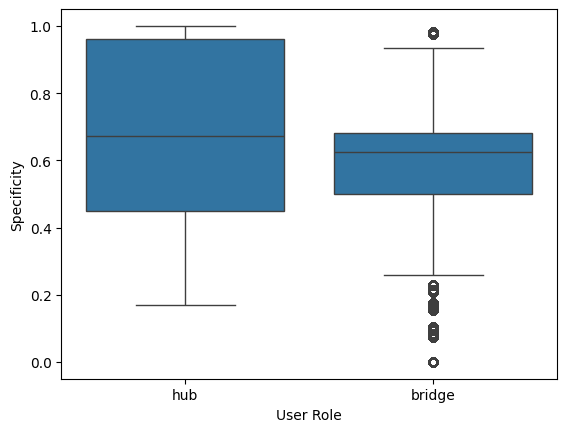

In [100]:
user_texts['role_temp'] = user_texts.apply(
    lambda row: 'hub' if row['is_hub'] else ('bridge' if row['is_bridge'] else 'other'),
    axis=1
)

sns.boxplot(x='role_temp', y='specificity_norm', data=user_texts[user_texts['role_temp'] != 'other'])
plt.ylabel('Specificity')
plt.xlabel('User Role')
plt.show()